In [36]:
import numpy as np                
import pandas as pd               

from keras.utils import np_utils  #匯入keras.utils因為後續要將label標籤轉換為ont hot encoding
np.random.seed(10)                #設定seed可以讓每次需要隨機產生的資料，都有相同輸出

In [37]:
from keras.datasets import mnist  #由keras載入現成的mnist資料
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data() #讀取mnist資料集
print('train data=',len(x_train_image))      #查看mnist資料集筆數可知訓練筆數共60000筆
print(' test data=',len(x_test_image))       #可知測試筆數共10000筆
print ('x_train_image:',x_train_image.shape) #訓練資料的型態是由28×28 像素構成
print ('y_train_label:',y_train_label.shape) 
#訓練資料是由images和label組成共60000筆
#images是單色的數字影像
#label是數字影像的真實值

train data= 60000
 test data= 10000
x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [38]:
import matplotlib.pyplot as plt         #匯入matplotlib.pyplot模組，製圖用
def plot_image(image):                  #定義plot_image函數，傳入image當作參數
    fig = plt.gcf()                     #通過plt.gcf即可得到當前的圖表 - gcf (Get Current Figure)
    fig.set_size_inches(2, 2)           #設定顯示圖形的大小（寬, 高）各2英吋
    plt.imshow(image, cmap='binary')    #使用plt.imshow顯示圖形，傳入參數image是28*28的圖形，cmap參數設定為binary以黑白灰階顯示
    plt.show()                          #開始繪圖

In [39]:
import matplotlib.pyplot as plt                 #匯入matplotlib.pyplot模組，繪圖用
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
#定義副程式，傳入images(數字影像),labels(真實值),prediction(預測結果),idx(開始顯示的資料index),num=10(要顯示的資料，預設10，不超過25)
    fig = plt.gcf()                             #通過plt.gcf即可得到當前的圖表 - gcf (Get Current Figure)
    fig.set_size_inches(12, 14)                 #設定顯示圖形的大小（寬=12英吋, 高=14英吋）
    if num>25: num=25                           #若顯示筆數參數>25,則強制設定為25，避免錯誤
    for i in range(0, num):                     #0~num-1共計num筆資料
        ax=plt.subplot(5,5, 1+i)                #建立subgraph子圖形為5行5列
        ax.imshow(images[idx], cmap='binary')   #畫出subgraph子圖形，色彩選擇灰階
        title= "label=" +str(labels[idx])       #設定子圖形title顯示標籤欄位
        if len(prediction)>0:                   #若有傳入預測結果
            title+=",predict="+str(prediction[idx]) #標題title加入預測結果
        ax.set_title(title,fontsize=10)         #設定子圖形的標題title與字體大小10
        ax.set_xticks([]);ax.set_yticks([])     #設定不顯示刻度
        idx+=1                                  #讀取下一筆
    plt.show()                                  #開始畫圖

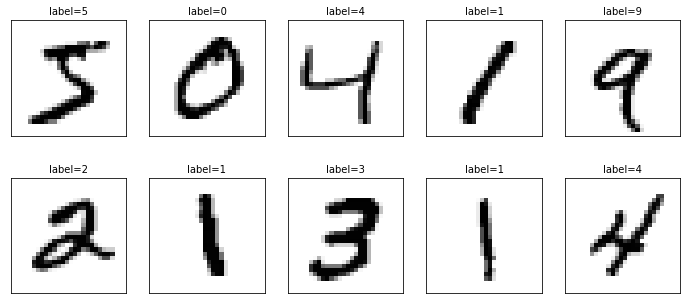

In [40]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)
#執行plot_images_labels_prediction函數，顯示train資料前10筆
#輸入x_train_image,y_train_label
#目前還沒有預測結果prediction所以傳入空list[]
#由第0筆顯示到第9筆

In [41]:
print ('x_test_image:',x_test_image.shape)#查看test測試資料image筆數
print ('y_test_label:',y_test_label.shape)#查看test測試資料label筆數
#由結果可知共計10000筆資料，test_image為28*28圖形

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


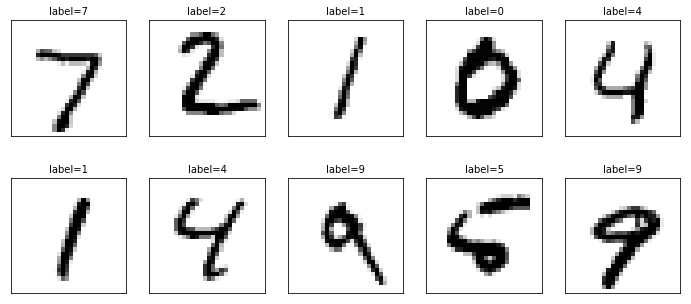

In [42]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)
#執行plot_images_labels_prediction函數，顯示train資料前10筆
#輸入x_test_image,y_test_label
#目前還沒有預測結果prediction所以傳入空list[]
#由第0筆顯示到第9筆

# 將images進行預處理

In [43]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
#將原本28*28的2維數字影像reshape(重塑)轉換為1維的向量，再以astype轉換為float，共28*28=784個float數字

In [44]:
#查看轉換為1維的向量的shape
print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [45]:
x_train_image[0] #查看訓練資料image第0筆
#由結果顯示，每個數字皆由0~255組成，代表圖形每個點的灰階的深淺

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [46]:
#image資料標準化，可提高後續訓練模型的準確率
#因為image的數字由0~255組成，故最簡單標準化就是直接將數值除以255
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

In [47]:
x_Train_normalize[0]                   #查看已被標準化的訓練資料image第0筆，其每點結果數值必界於0~1之間

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# one hot encoding

In [48]:
y_train_label[:5]                           #查看訓練資料label標籤欄位前5筆訓練資料

array([5, 0, 4, 1, 9], dtype=uint8)

In [49]:
#label欄位原本是0~9的數字，因0~9皆是等價關係，故須使用One-hot encoding讓這10個數字距離原點是相同距離
#先將0~9從成1個欄位拆成10個欄位
#因此0就是(1,0,0,0,0,0,0,0,0,0), 1就是(0,1,0,0,0,0,0,0,0,0)，依此類推
#屬於哪個數字，就在哪個位置為 1，其他位置都是 0，正好對應到輸出層10個神經元，這10個對於原點的距離都是1
#而此使用np_utils.to_categorical分別傳入訓練資料與測試資料的label標籤欄位，執行one hot encode(類別資料的處理-有序、無序)轉換
y_Train_OneHot = np_utils.to_categorical(y_train_label)   #將 training 的 label 進行 one-hot encoding
y_Test_OneHot = np_utils.to_categorical(y_test_label)     #將測試的 labels 進行 one-hot encoding
y_Train_OneHot[:5] #查看執行one-hot encoding轉換後的label標籤欄位

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 建立模型

In [50]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
#將「輸入層」與「隱藏層」加入模型
#加'輸入層'與'隱藏層'到模型中，使用mode.add()加入dense神經網路層
#dense神經網路層特色：所有的上一層與下一層的神經元，都完全連接
model.add(Dense(units=1000,                  #原本定義'隱藏層'神經元個數256，這邊更改為1000
                input_dim=784,               #設定'輸入層'神經元個數784(因原本是28*28的2維影像，以reshape轉換為1維的向量，也就是784個float數字)
                kernel_initializer='normal', #使用normal distribution常態分佈的亂數，初始化weight(權重)bias(偏差)
                activation='relu'))          #定義激活函數relu
#將「輸出層」加入模型
model.add(Dense(units=10,                     #定義'輸出層'神經元個數10
                kernel_initializer='normal',  #使用normal distribution常態分佈的亂數，初始化weight(權重)bias(偏差)
                activation='softmax'))        #定義激活函數softmax
print(model.summary())                        #查看模型的摘要
#由此可看到共有2層：
#隱藏層：共1000個神經元，因輸入層與隱藏層一起建立，所以沒有顯示輸入層
#輸出層：共10個神經元
#每一層prame是超參數，需透過反向傳播演算法，更新神經元連接的權重(weight)與偏差(bias)
#每層param計算方式：param = (上一層神經元數量) * (本層神經元數量) + (本層神經元數量)
#建立輸入層與隱藏層，公式：h1 = relu ( X * W1 + b1 )，故隱藏層的param ： 784 * 1000 + 1000 = 785000
#建立隱藏層與輸出層，公式：y = softmax ( h1 * W2 + b2 )，故輸出層的param ：1000 * 10 + 10 = 10010
#全部必須訓練的超參數trainable params是每一層的params的加總 ： 785000 + 10010 = 795010

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [51]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
#compile(編寫)方法須輸入下列參數：
#loss:設定損失函數(loss function)，在深度學習通常使用cross_entropy交叉熵，訓練效果相對較好
#optiimizer:設定訓練時的最佳化方法，在深度學習通常使用adam最佳化方法，可以讓訓練更快收斂，並提高準確率
#metrics:設定評估模型的方式是accuracy準確率

#開始訓練
train_history =model.fit(x=x_Train_normalize,  #x_Train_normalize : features數字影像的特徵值
                         y=y_Train_OneHot,     #y_Train_OneHot : label數字影像真實的值
                         validation_split=0.2,  
                         epochs=10,            #執行10次訓練週期
                         batch_size=200,       #每一批次200筆資料
                         verbose=2)
#validation_split：0~1之間的浮點數，用來指定訓練集的一定比例數據作為驗證集。
 #驗證集將不參與訓練，並在每個epoch結束後測試的模型的指標，如損失函數、精確度等。
 #validation_split : 這邊是訓練之前keras會自動將資料分成80%的訓練資料與20%的驗證資料
 #因總資料量60000，故訓練資料60000*0.8=48000，驗證資料60000*0.2=12000
#verbose：日志顯示，0為不在標準輸出流輸出日志信息，1為輸出進度條記錄，2為每個epoch輸出一行記錄
#epochs(訓練週期)訓練完成後，會計算此次訓練週期的accuracy(準確率_與loss(誤差)，
 #並新增一筆資料紀錄在train_history
#結果: Train on 48000 samples, validate on 12000 samples 表示資料分成80%的訓練資料與20%的驗證資料
#loss: 0.0317 - acc: 0.9917          表示使用訓練資料計算loss與準確率
#val_loss: 0.0800 - val_acc: 0.9761  表示使用驗證資料計算loss與準確率
#由結果可以發現LOSS誤差越來越小而準確率越來越高

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.2945 - acc: 0.9151 - val_loss: 0.1528 - val_acc: 0.9566
Epoch 2/10
 - 5s - loss: 0.1180 - acc: 0.9663 - val_loss: 0.1072 - val_acc: 0.9685
Epoch 3/10
 - 5s - loss: 0.0761 - acc: 0.9784 - val_loss: 0.0918 - val_acc: 0.9732
Epoch 4/10
 - 5s - loss: 0.0517 - acc: 0.9851 - val_loss: 0.0876 - val_acc: 0.9732
Epoch 5/10
 - 6s - loss: 0.0361 - acc: 0.9901 - val_loss: 0.0762 - val_acc: 0.9754
Epoch 6/10
 - 5s - loss: 0.0259 - acc: 0.9932 - val_loss: 0.0740 - val_acc: 0.9778
Epoch 7/10
 - 5s - loss: 0.0184 - acc: 0.9959 - val_loss: 0.0717 - val_acc: 0.9793
Epoch 8/10
 - 5s - loss: 0.0133 - acc: 0.9972 - val_loss: 0.0709 - val_acc: 0.9793
Epoch 9/10
 - 5s - loss: 0.0090 - acc: 0.9986 - val_loss: 0.0712 - val_acc: 0.9797
Epoch 10/10
 - 5s - loss: 0.0063 - acc: 0.9993 - val_loss: 0.0711 - val_acc: 0.9799


# 以圖形顯示訓練過程

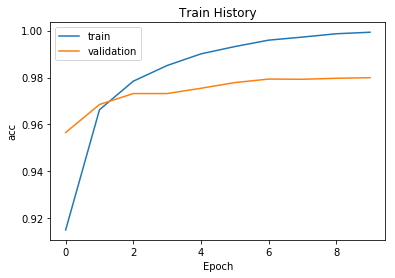

In [52]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
#定義副程式，輸入參數：之前訓練過程所產生的train_history，訓練資料的執行結果，驗證資料的執行結果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')                            #顯示圖的標題：Train History
    plt.ylabel(train)                                     #顯示y軸的標籤
    plt.xlabel('Epoch')                                   #顯示x軸標籤是Epoch
    plt.legend(['train', 'validation'], loc='upper left') #設定圖利顯示'train', 'validation'，位置在左上角
    plt.show()
show_train_history(train_history,'acc','val_acc')
#訓練到最後會發現'訓練的準確率'比'驗證的準確率'高
#acc訓練的準確率:以訓練的資料計算準確率，因相同的資料已訓練過，又拿來計算準確率，故準確率會比較高(想成考試拿相同考題給你做，自然考得高)
#val_acc驗證的準確率:以驗證的資料計算準確率，因這些資料未經訓練，故準確率相對較低，但這樣準確率相對客觀符合真實情況，
 #(想成老師重新出題，沒碰過會比較難，但能知道你真實層度能力)
#若acc一直增加但val_acc一直沒增加，可能為overfitting(過度擬合)現象
#過度擬合現象更嚴重

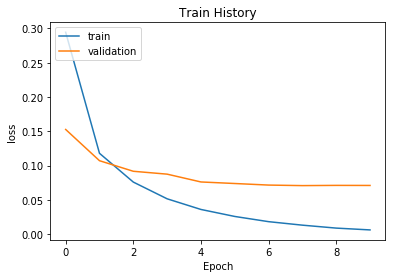

In [53]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [54]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 63us/step

accuracy= 0.9805


# 進行預測

In [55]:
prediction=model.predict_classes(x_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

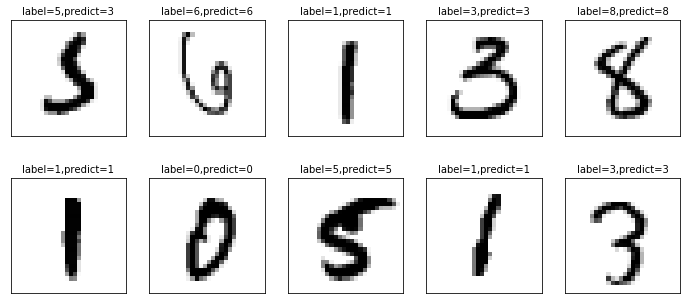

In [56]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

# 混淆矩陣

In [57]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,0,2,1,0,1,1,2,0
1,0,1129,2,1,0,1,0,1,1,0
2,3,1,1005,6,3,0,2,7,5,0
3,1,0,1,998,0,2,0,3,3,2
4,1,2,5,1,964,0,2,1,1,5
5,3,0,0,19,1,856,6,1,3,3
6,4,3,1,1,4,3,941,0,1,0
7,1,4,7,4,0,0,0,1008,2,2
8,3,0,4,12,3,0,1,3,945,3


In [59]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [60]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2162,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3


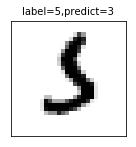

In [61]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)

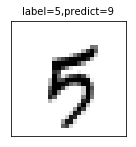

In [62]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=1289,num=1)